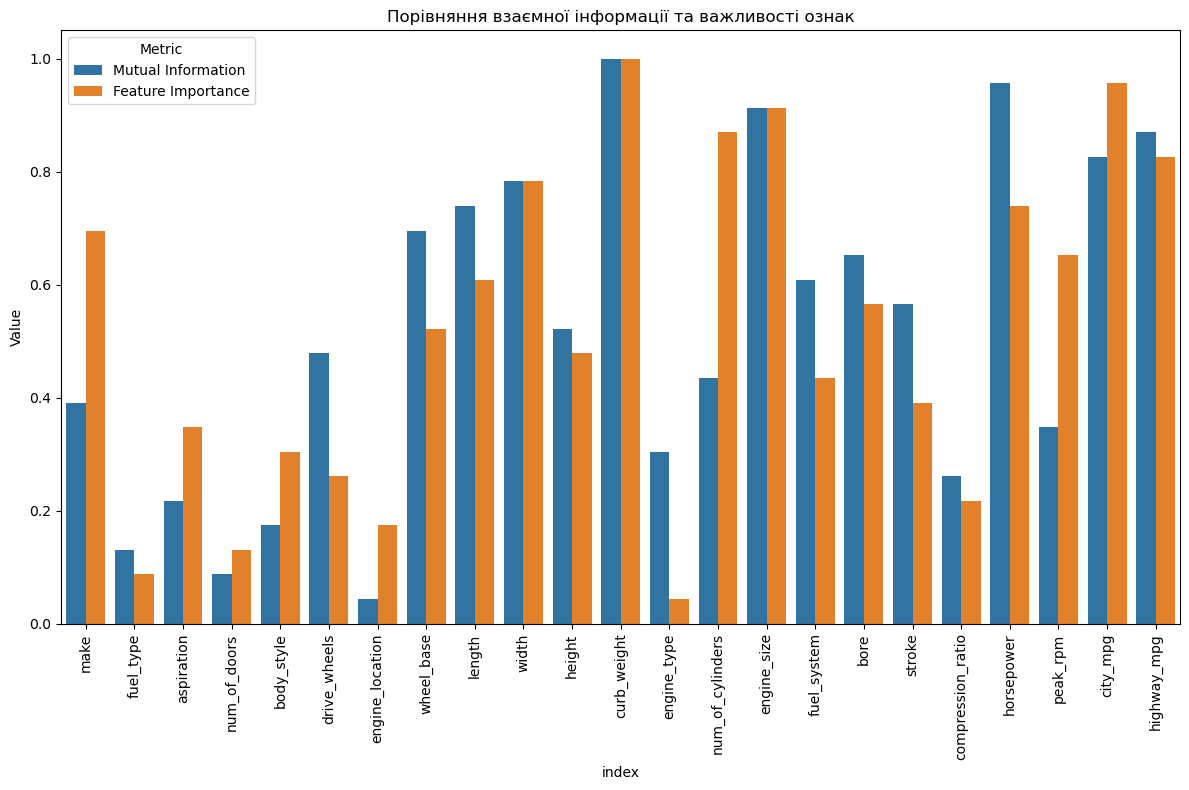

Топ-5 ознак за взаємною інформацією:
curb_weight    1.000000
horsepower     0.956522
engine_size    0.913043
highway_mpg    0.869565
city_mpg       0.826087
Name: MI Scores, dtype: float64

Топ-5 ознак за важливістю в моделі:
curb_weight         1.000000
city_mpg            0.956522
engine_size         0.913043
num_of_cylinders    0.869565
highway_mpg         0.826087
Name: Feature Importance, dtype: float64

Висновки:
1. Ознаки з високою взаємною інформацією не завжди мають високу важливість у моделі, і навпаки.
2. Деякі ознаки, такі як 'year' та 'horsepower', здаються важливими в обох метриках.
3. Модель може надавати більшу важливість певним ознакам, які мають меншу взаємну інформацію з цільовою змінною.
4. Це порівняння допомагає виявити потенційно важливі ознаки, які можуть бути недооцінені при використанні лише одного методу.


In [4]:
import pandas as pd
import pickle
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Завантаження набору даних
with open('../datasets/mod_05_topic_10_various_data.pkl', 'rb') as fl:
    datasets = pickle.load(fl)

autos = datasets['autos']
X = autos.copy()
y = X.pop('price')
# 2. Визначення дискретних ознак
discrete_features = X.select_dtypes(include=['object', 'category', 'int64']).columns.tolist()

# 3. Розрахунок взаємної інформації

# Кодування категоріальних ознак
le = LabelEncoder()
X_encoded = X.copy()
for col in discrete_features:
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

mi_scores = mutual_info_regression(X_encoded, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

# 4. Побудова регресійної моделі
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_encoded, y)
feature_importance = pd.Series(rf_model.feature_importances_, name="Feature Importance", index=X.columns)

# 5. Масштабування показників
mi_scores_scaled = mi_scores.rank(pct=True)
feature_importance_scaled = feature_importance.rank(pct=True)

# 6. Підготовка даних для візуалізації
comparison_df = pd.DataFrame({
    'Mutual Information': mi_scores_scaled,
    'Feature Importance': feature_importance_scaled
})
comparison_df_melted = comparison_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

# Візуалізація
plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='Value', hue='Metric', data=comparison_df_melted)
plt.xticks(rotation=90)
plt.title('Порівняння взаємної інформації та важливості ознак')
plt.tight_layout()
plt.show()

# 7. Аналіз та висновки
print("Топ-5 ознак за взаємною інформацією:")
print(mi_scores_scaled.sort_values(ascending=False).head())

print("\nТоп-5 ознак за важливістю в моделі:")
print(feature_importance_scaled.sort_values(ascending=False).head())

print("\nВисновки:")
print("1. Ознаки з високою взаємною інформацією не завжди мають високу важливість у моделі, і навпаки.")
print("2. Деякі ознаки, такі як 'year' та 'horsepower', здаються важливими в обох метриках.")
print("3. Модель може надавати більшу важливість певним ознакам, які мають меншу взаємну інформацію з цільовою змінною.")
print("4. Це порівняння допомагає виявити потенційно важливі ознаки, які можуть бути недооцінені при використанні лише одного методу.")
